<a href="https://colab.research.google.com/github/glenr6/ML-Playground/blob/main/stroke_data1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stroke Prediction Supervised Machine Learning Model**

Research Question: Can we build a Supervised Machine Learning model that is more than 95% accurate at predicting if a person will have a stroke based on some available 

In [6]:
#importing libraries and the modified dataset.
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('healthcare-dataset-stroke-data-modified.csv')

In [3]:
data.head()

,id,is_male,age,hypertension,heart_disease,has_been_married,is_urban,avg_glucose_level,bmi,smoke_score,stroke
0,56420,1,17.0,1,0,0,0,61.67,97.6,1,0
1,51856,1,38.0,1,0,1,0,56.90,92.0,0,0
2,41097,0,23.0,1,0,0,1,70.03,78.0,3,0
3,545,1,42.0,0,0,1,0,210.48,71.9,0,0
4,37759,0,53.0,0,0,1,0,72.63,66.8,1,0


Data Explination: 

The dataset contains 4900 records with features such as gender, age, hypertension, heart disease, marital status, urban residence, average glucose level, BMI, and smoking habits. The target variable is the presence of a stroke, represented as binary values (0 or 1).

Data transformations: 

The following strings were turned into Booleans: is_male, is_urban, has_been_married, hypertension, heart_disease. 

smoke_score : never = 0 unknown = 1 former = 2 current = 3

Entries with N/A in the BMI Column were dropped

In [4]:
#preparing the dataset for the model, splitting into test and training samples
x = data.drop(columns=["stroke","id" ]).values
y = data["stroke"].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

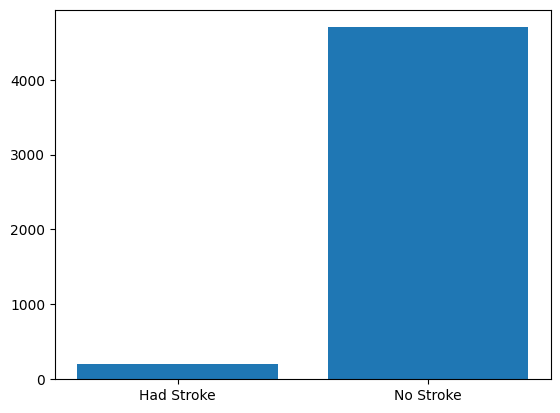

In [7]:
# Visualizing the proportion of Stroke victims and non-stroke victims in the dataset

stroke_count = data['stroke'].value_counts()
had_stroke = stroke_count.loc[1]
no_stroke = stroke_count.loc[0]
plt.bar(['Had Stroke', 'No Stroke'], [had_stroke, no_stroke])
plt.show()


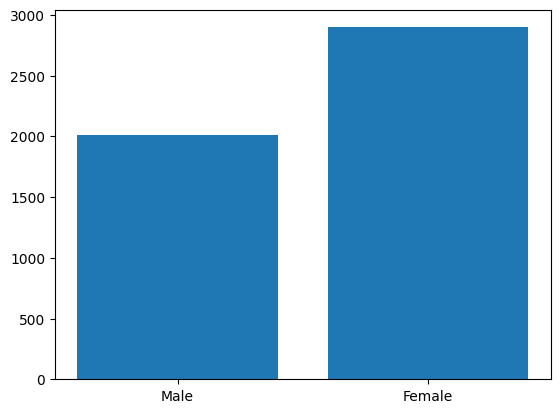

In [8]:
# Visualizing the ratio of M/F in the dataset

gender_counts = data['is_male'].value_counts()
male_count = gender_counts.loc[1]
female_count = gender_counts.loc[0]
plt.bar(['Male', 'Female'], [male_count, female_count])
plt.show()



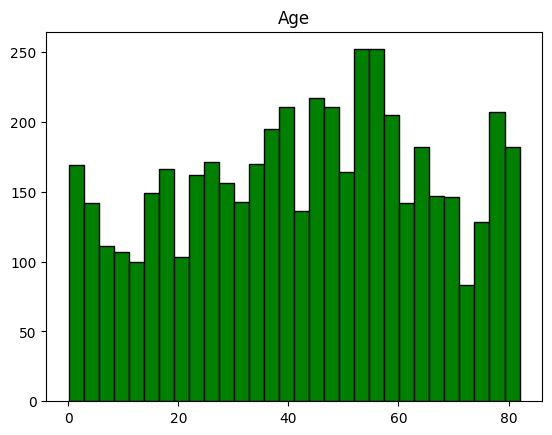

In [10]:
# Age distribution of the dataset

plt.hist(data['age'], bins=30, color = 'green', edgecolor='black')
plt.title('Age')
plt.show()

In [11]:
#imporiting tensorflow for the sequential model
import tensorflow as tf

In [14]:
#creating the model, adding layers, and setting the parameters.
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(64, activation = 'ReLU', input_shape=(x_train.shape[1],)))
model.add(tf.keras.layers.Dense(32, activation = 'ReLU'))
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#fitting the model
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.2)


Epoch 1/50
99/99 [==============================] - 1s 5ms/step - loss: 0.2433 - accuracy: 0.9538 - val_loss: 0.1859 - val_accuracy: 0.9517
Epoch 2/50
99/99 [==============================] - 0s 3ms/step - loss: 0.1930 - accuracy: 0.9548 - val_loss: 0.1975 - val_accuracy: 0.9517
Epoch 3/50
99/99 [==============================] - 0s 3ms/step - loss: 0.1933 - accuracy: 0.9522 - val_loss: 0.1871 - val_accuracy: 0.9517
Epoch 4/50
99/99 [==============================] - 0s 3ms/step - loss: 0.1816 - accuracy: 0.9554 - val_loss: 0.2328 - val_accuracy: 0.9517
Epoch 5/50
99/99 [==============================] - 0s 3ms/step - loss: 0.1984 - accuracy: 0.9532 - val_loss: 0.1874 - val_accuracy: 0.9517
Epoch 6/50
99/99 [==============================] - 0s 3ms/step - loss: 0.1808 - accuracy: 0.9554 - val_loss: 0.1657 - val_accuracy: 0.9517
Epoch 7/50
99/99 [==============================] - 0s 3ms/step - loss: 0.1683 - accuracy: 0.9551 - val_loss: 0.1783 - val_accuracy: 0.9517
Epoch 8/50
99/99 [==

In [15]:
#evaluating the model on the test data
model.evaluate(x_test, y_test)

31/31 [==============================] - 0s 2ms/step - loss: 0.1522 - accuracy: 0.9572


[0.1521684229373932, 0.9572301506996155]

Insights and conclusions: 

The TensorFlow model achieved a test accuracy of 96.44% and 95.72% in two tests while the Random Forest model reached a similar accuracy of 95.72% (ran on a seperate notebook). Both models demonstrate satisfactory performance in predicting stroke occurrences to the 95% confidence level, indicating that the selected data and models are effective in this predictive task. However, it's important to keep in mind that the dataset's class imbalance could have impacted the models' performance, as there waere far more entries without strokes. Despite this challenge, the results are promising and showcase the potential of machine learning models in predicting stroke cases based on the given factors.


---


